In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import argparse, os
import numpy as np
from geopandas import read_file
from sys import exit

def process_command_line():
    '''Parse the commandline'''
    parser = argparse.ArgumentParser(description='Script to idenfity basin HUC ids based on outlet flow gauge HUC id.')
    parser.add_argument('shpfile', help='path of the HUC12 shapefile.')
    parser.add_argument('huc12', help='HUC12 field name.')
    parser.add_argument('Tohuc12', help='downstream HUC12 field name.')
    parser.add_argument('hucid', help='HUC12 Id of the outlet flow gauge (in string). Obtained by viewing usgs_gauge_conus.shp and Catchment_UCOplus.shp.')
    parser.add_argument('case', help='case study area name in string. no space please.')
    parser.add_argument('outdir_base', help='base output directory. case name will be added after it.')
    parser.add_argument('shp', help='output shape filename to save case study HUC12.')
    parser.add_argument('txt', help='output text filename to save HUCId list.')
    args = parser.parse_args()
    return(args)

def unique(list1):
    list_uniqe = []
    for x in list1:
        if not x in list_uniqe:
            list_uniqe.append(x)
    return list_uniqe

# main
if __name__ == '__main__':
  
    # process command line
#     args = process_command_line()
#     args_shpfile = '/glade/work/andywood/wreg/gis/shapes/west_huc12/WEST.huc12.shp'
    args_shpfile = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/discretize/source_data/west_huc12/WEST.huc12.shp'
    args_huc12   = 'HUC12'     
    args_Tohuc12 = 'ToHUC'
    args_hucid   = '140500010409' #'100800120304'
    args_case    = 'yampa'
    args_outdir_base  = '/glade/u/home/hongli/scratch/2020_11_29discretization_error/discretize'
    args_shp     = 'huc12.shp'
    args_txt     = 'huc12Ids.txt'
    
    # create outdir
    outdir = os.path.join(args_outdir_base, args_case)
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    # read HUC12 shapefile
    print('read shapefile')
    data = read_file(args_shpfile)
    if not args_huc12 in data.columns.values:
        exit(args_huc12+' column does not exist in shapefile.')
    else:
        hucs = data[args_huc12].values
    if not args_Tohuc12 in data.columns.values:
        exit(args_Tohuc12+' column does not exist in shapefile.')
    else:
        # create Tohuc12int column       
        tohucs = data[args_Tohuc12].values
    data = data[[args_huc12,args_Tohuc12,'geometry']]

    # method 1: search upstream hucs base on the most downstream hucId
    # NOTE: West HUC2 is special in that args_huc12 is int, but args_Tohuc12 is string.
    
    
    # search upstream HUCs 
    print('search upstream HUCs')
    basin_hucs = [args_hucid]
    huc_found = np.unique(hucs[np.where(tohucs==args_hucid)])
    basin_hucs.extend(list(huc_found))
    round_num = 0

    while len(huc_found) != 0:

        round_num = round_num+1
        print("Round %d. Totally %d HUCs are found." % (round_num, len(basin_hucs)))

        # search upstream hucs
        huc_found_next = []
        for huc_i in huc_found:
            huc_found_next.extend(list(hucs[np.where(tohucs==huc_i)]))
        huc_found_next = unique(huc_found_next)

        # identify if the found HUCs exist in upstrm_hucs
        huc_found = [huc for huc in huc_found_next if not huc in basin_hucs]
        basin_hucs.extend(huc_found)

#     # method 2: manually add basin_hucs
#     # here huc12 list is from the bighorn model forcing nc file (hurId).
#     basin_hucs= np.loadtxt('/glade/u/home/andywood/proj/SHARP/wreg/bighorn/prep/lists/hucIds.06279940.txt',dtype=int)
# #     basin_hucs=[100800120304, 100800120302, 100800120303, 100800120301,
# #                 100800120209, 100800120207, 100800120204, 100800120205, 100800120208,
# #                 100800120206, 100800120105, 100800120201, 100800120202, 100800120203,
# #                 100800120101, 100800120102, 100800120103, 100800120104]
    # save to text
    print('save to text')
    np.savetxt(os.path.join(outdir, args_txt), basin_hucs, fmt='%s')
    
    # save to shapefile
    print('save to shapefile')
    data[data[args_huc12].isin(basin_hucs)].to_file(os.path.join(outdir,args_shp))
    
print('Done')

read shapefile
search upstream HUCs
Round 1. Totally 4 HUCs are found.
Round 2. Totally 8 HUCs are found.
Round 3. Totally 10 HUCs are found.
Round 4. Totally 13 HUCs are found.
Round 5. Totally 17 HUCs are found.
Round 6. Totally 19 HUCs are found.
Round 7. Totally 20 HUCs are found.
save to text
save to shapefile
Done


In [22]:
# data = read_file(args_shpfile)
# data.head()
data.columns
data[['HUC12','HUC12int','ToHUC']]

HUC12      HUC12int         ToHUC
0      080402060101   80402060101  080402060103
1      080402060102   80402060102  080402060103
2      080402060103   80402060103  080402060105
3      080402060104   80402060104  080402060105
4      080402060105   80402060105  080402060108
...             ...           ...           ...
56962  102500100304  102500100304  102500100305
56963  102500100405  102500100405  102500110305
56964  102500110102  102500110102  102500110103
56965  102500110303  102500110303  102500110304
56966  102500110304  102500110304  102500110305

[56967 rows x 3 columns]

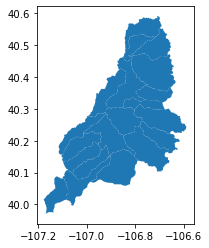

In [24]:
data[data[args_huc12].isin(basin_hucs)].plot()

In [8]:
data[data[args_huc12].isin(basin_hucs)]

HUC12int         ToHUC  \
6935  140500010406  140500010409   
6936  140500010407  140500010409   
6937  140500010408  140500010409   
6938  140500010409  140500010410   

                                               geometry  
6935  POLYGON ((-106.85045 40.46215, -106.85009 40.4...  
6936  POLYGON ((-106.69380 40.55117, -106.69218 40.5...  
6937  POLYGON ((-106.69970 40.58173, -106.69997 40.5...  
6938  POLYGON ((-106.77490 40.53538, -106.77403 40.5...

In [18]:
data[data['HUC12int']==140500010401]

HUC12int         ToHUC  \
6930  140500010401  140500010406   

                                               geometry  
6930  POLYGON ((-106.81014 40.33512, -106.80976 40.3...

In [16]:
data[data['ToHUC']=='140500010406']

HUC12int         ToHUC  \
6930  140500010401  140500010406   
6931  140500010402  140500010406   
6933  140500010404  140500010406   
6934  140500010405  140500010406   

                                               geometry  
6930  POLYGON ((-106.81014 40.33512, -106.80976 40.3...  
6931  POLYGON ((-106.74794 40.37325, -106.74848 40.3...  
6933  POLYGON ((-106.85146 40.42260, -106.85105 40.4...  
6934  POLYGON ((-106.75728 40.47230, -106.75677 40.4...